<a href="https://colab.research.google.com/github/aindrila61/ML/blob/main/Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np   #Used for numerical computations and handling arrays.
import pandas as pd  #For data manipulation and analysis using DataFrames.
import matplotlib.pyplot as plt   #Used for creating static visualizations like line plots, histograms, etc.
import seaborn as sns    #High-level data visualization library built on top of matplotlib for beautiful plots.
sns.set()    #Sets the default aesthetic parameters for Seaborn plots like background color, font size etc
from mlxtend.plotting import plot_decision_regions   #Plots decision boundaries for classification algorithms.
import missingno as msno    # Visualizes missing data patterns in a dataset.
from pandas.plotting import scatter_matrix   #Creates a grid of scatter plots for visualizing pairwise relationships between features.
from sklearn.preprocessing import StandardScaler   #Standardizes features by removing the mean and scaling to unit variance.
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing subsets.
from sklearn.neighbors import KNeighborsClassifier   #Implements the K-Nearest Neighbors classification algorithm.
from sklearn.metrics import confusion_matrix      #evaluate classification performance.
from sklearn import metrics   #Module that includes various metrics for model evaluation (accuracy, precision, etc.).
from sklearn.metrics import classification_report   #Generates a text report of precision, recall, f1-score, and support.
from sklearn.metrics import roc_curve  #Computes the Receiver Operating Characteristic (ROC) curve.
from sklearn.metrics import roc_auc_score  #Calculates the Area Under the ROC Curve (AUC) score.
from sklearn.model_selection import GridSearchCV  #Performs hyperparameter tuning using grid search with cross-validation. means splitting your training data multiple times to test model consistency
import warnings  #Handles warnings during code execution like Issues like dividing by zero or invalid operations
warnings. filterwarnings('ignore')  #Suppresses all warning messages to keep output clean.
%matplotlib inline  #Jupyter Notebook magic to display matplotlib plots inline in the notebook.

scatter_matrix

If your DataFrame df has 4 columns (A, B, C, D), it will create:

Scatter plot of A vs B, A vs C, A vs D,

B vs C, B vs D, etc.,

along with histograms on the diagonal (like A vs A, B vs B).

confusion_matrix

the confusion matrix shows how many correct vs incorrect predictions your model made, separated into:

True Positives (TP)

True Negatives (TN)

False Positives (FP)

False Negatives (FN)



classification_report

Precision	->Of the samples predicted as positive, how many were actually positive?
 TP / (TP + FP)
Recall->	Of the actual positives, how many did the model correctly identify?
TP / (TP + FN)
F1-score	->The harmonic mean of Precision and Recall (balance between them)
 2 * (Precision * Recall) / (Precision + Recall)
Support->	The number of actual samples in each class

Hyperparameters are the settings you give to the model, not learned from data.
Example for KNeighborsClassifier:

n_neighbors (number of neighbors to consider)

weights ('uniform' or 'distance')
These can affect model accuracy a lot.

In [6]:
diabetes_df=pd.read_csv("/content/diabetes.csv")
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_df.info()  #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#to know more about the dataset
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

25% of people are 24 or younger

75% of people are 41 or younger

The middle 50% (IQR) is between 24 and 41

In [11]:
# checking if there is some null values or not
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [15]:
diabetes_df_copy = diabetes_df.copy(deep = True)  #All data, indices, and values are fully copied as we are using deep=true
diabetes_df_copy[[ 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin', 'BMI' ]] = diabetes_df_copy[[ 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']].replace(0,np.nan)
# Showing the Count of nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


means we have 5 nan value in glucose

There are lots of 0s in few columns which are shown here and for outcome column 0 means not diabetic and 1 means diabetic

**Data Visualization**

In [21]:
# Plotting the data distribution plots
p = diabetes_df.hist(figsize = (15,10)) #(width,ht)   #histogram plot means A histogram is a representation of the distribution of data

In [18]:
# Aiming to impute nan values for the columns in accordance with their distribution means converting nan with the mean or median of the data column
diabetes_df_copy[ 'Glucose' ] . fillna(diabetes_df_copy[ 'Glucose' ].mean(), inplace = True)
diabetes_df_copy[ 'BloodPressure' ] . fillna(diabetes_df_copy [ 'BloodPressure' ] .mean(), inplace= True)
diabetes_df_copy[ 'SkinThickness' ] . fillna(diabetes_df_copy[ 'SkinThickness' ].median(), inplace = True)
diabetes_df_copy[ 'Insulin' ] . fillna(diabetes_df_copy['Insulin' ].median(), inplace= True)
diabetes_df_copy[ 'BMI' ] . fillna(diabetes_df_copy['BMI'].median(), inplace = True)

 fillna->is used to fill missing values (nans) in the 'Glucose' column with the mean of that column, directly updating the DataFrame.

inplace=True, tells Pandas to apply the change directly to the original DataFrame, without returning a new copy.


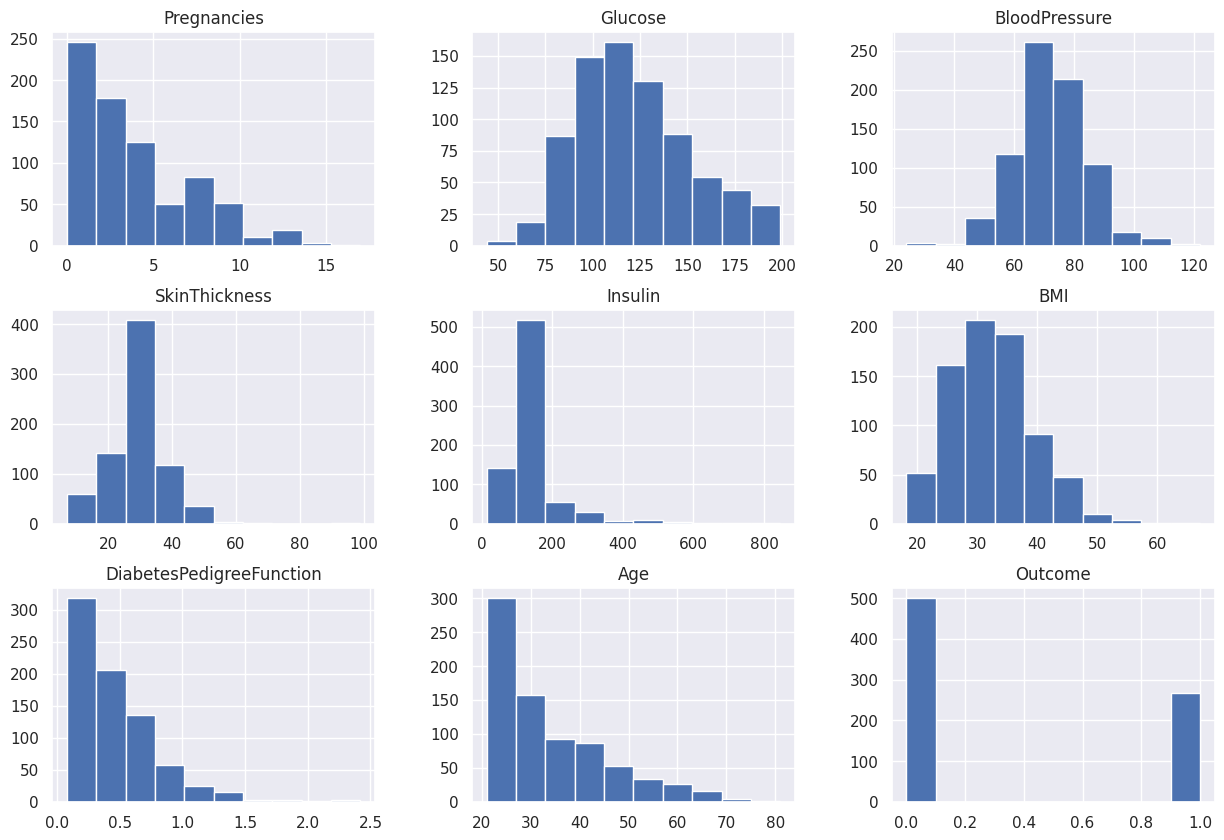

In [22]:
# Plotting the distributions after removing the NAN values
p = diabetes_df_copy.hist(figsize = (15,10))

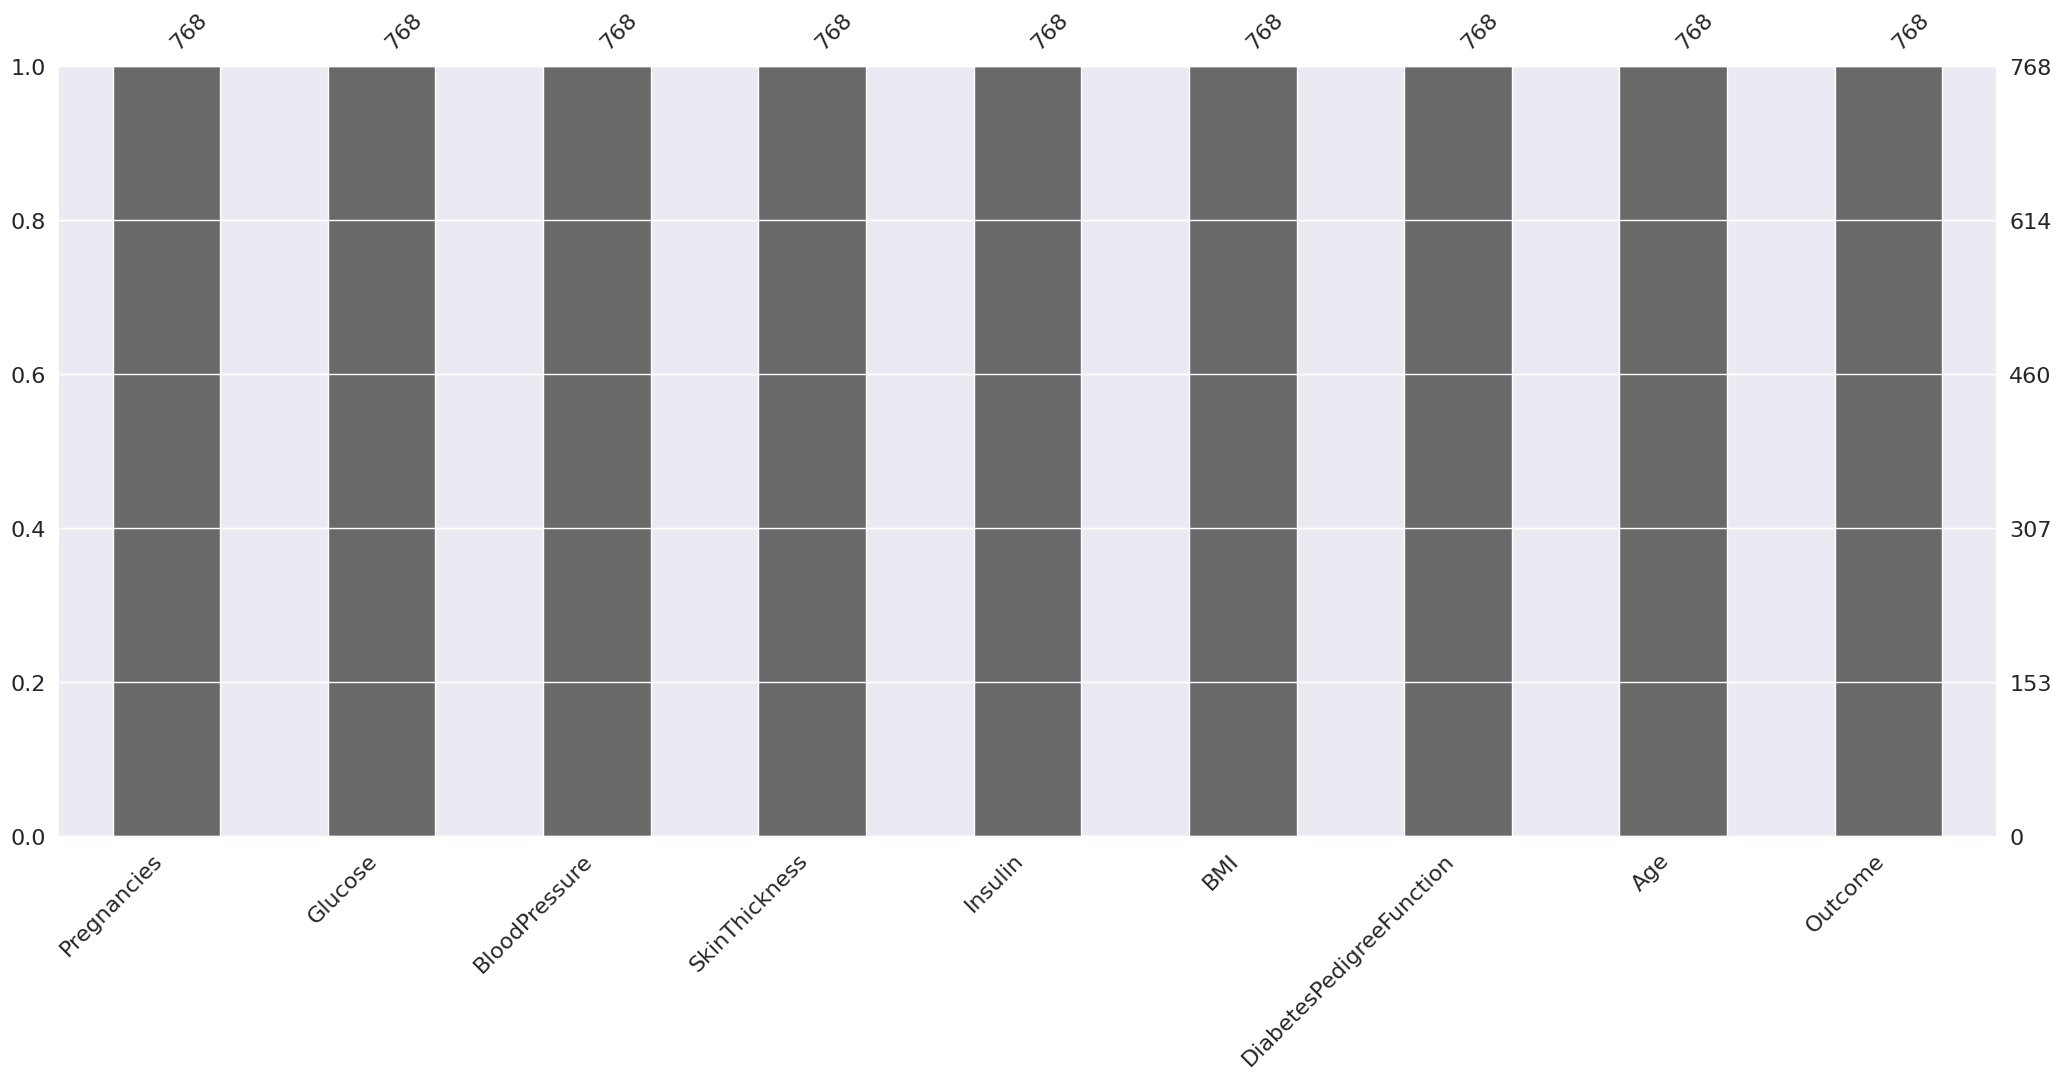

In [23]:
# Plotting Null count analysis plot
p= msno.bar(diabetes_df)   # (from the missingno library)It creates a bar chart showing how much data is missing or present in each column of your DataFrame.

In [27]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 2: "	#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x+ 1))
print(diabetes_df. Outcome.value_counts())
p=diabetes_df. Outcome. value_counts() .plot(kind="bar")

Outcome
0    500
1    268
Name: count, dtype: int64


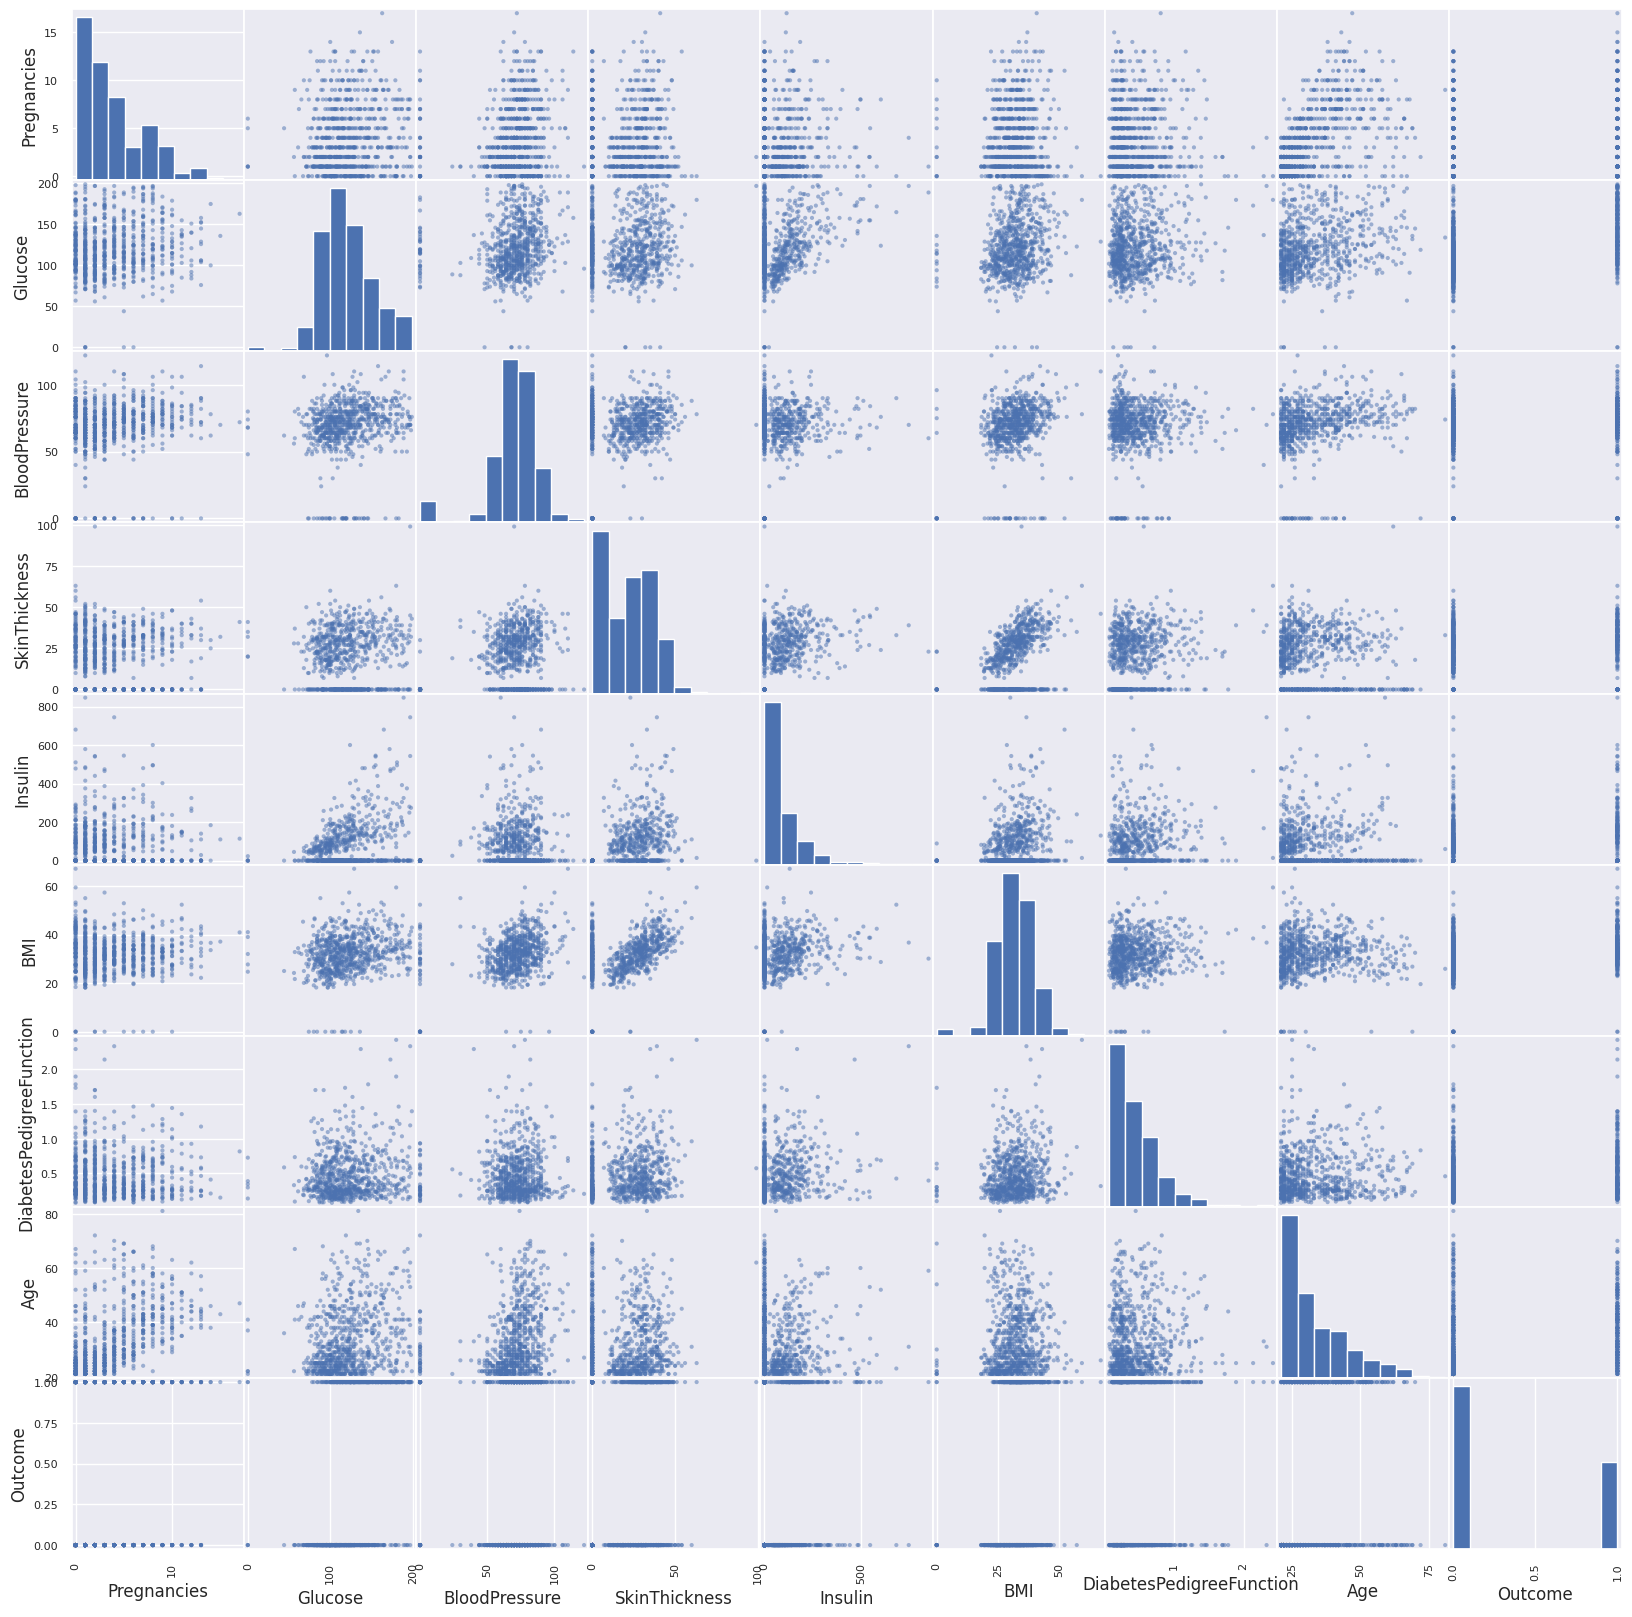

In [30]:
# Plotting a Scatter matrix of uncleaned data
p=scatter_matrix(diabetes_df,figsize=(20,20))

Here BMI and Skin Thickness has better correlation for the above plot

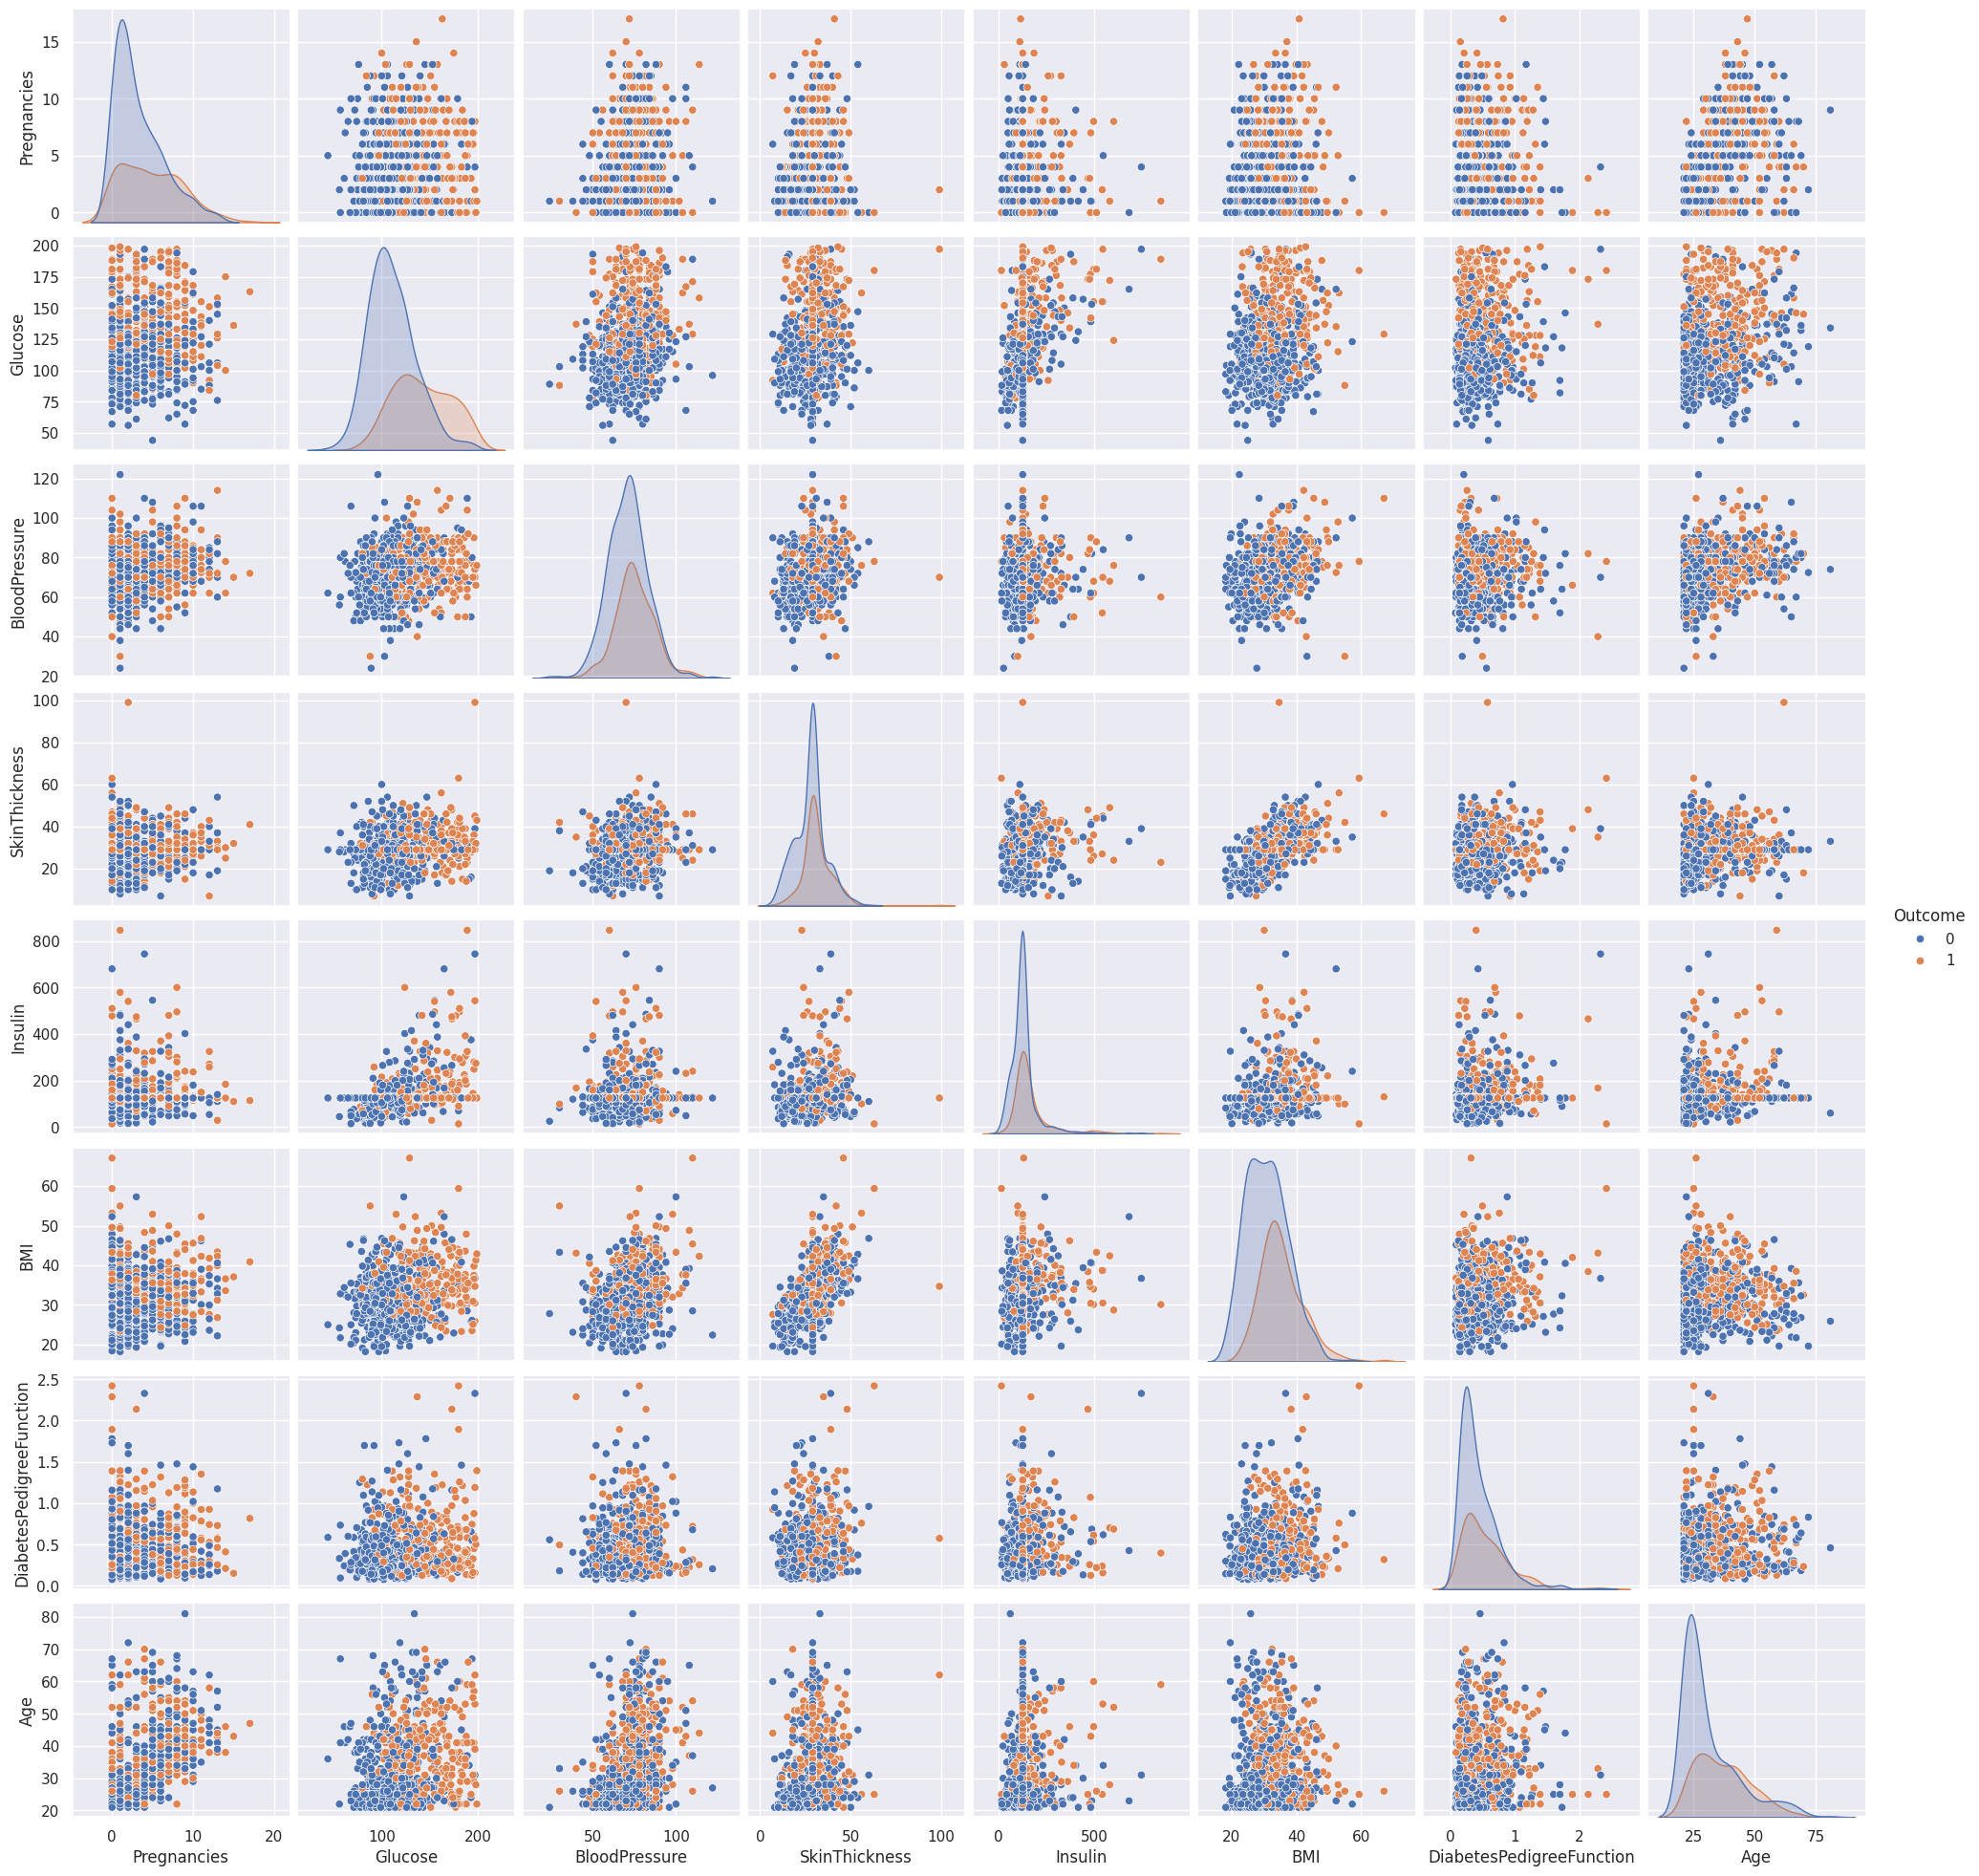

In [32]:
# Plotting the Pair Plots for the data
p=sns.pairplot(diabetes_df_copy, hue = 'Outcome' ) # hue is used for grouping of variable that will produce points with different colors
#sns.pairplot->This is a function from Seaborn used for visualizing pairwise relationships in a dataset.

**Correlation between all the features**

Heatmap->A heat map is a two-dimensional graphical representation of data
In the heat map, the individual values are arranged in a matrix represented as colors.

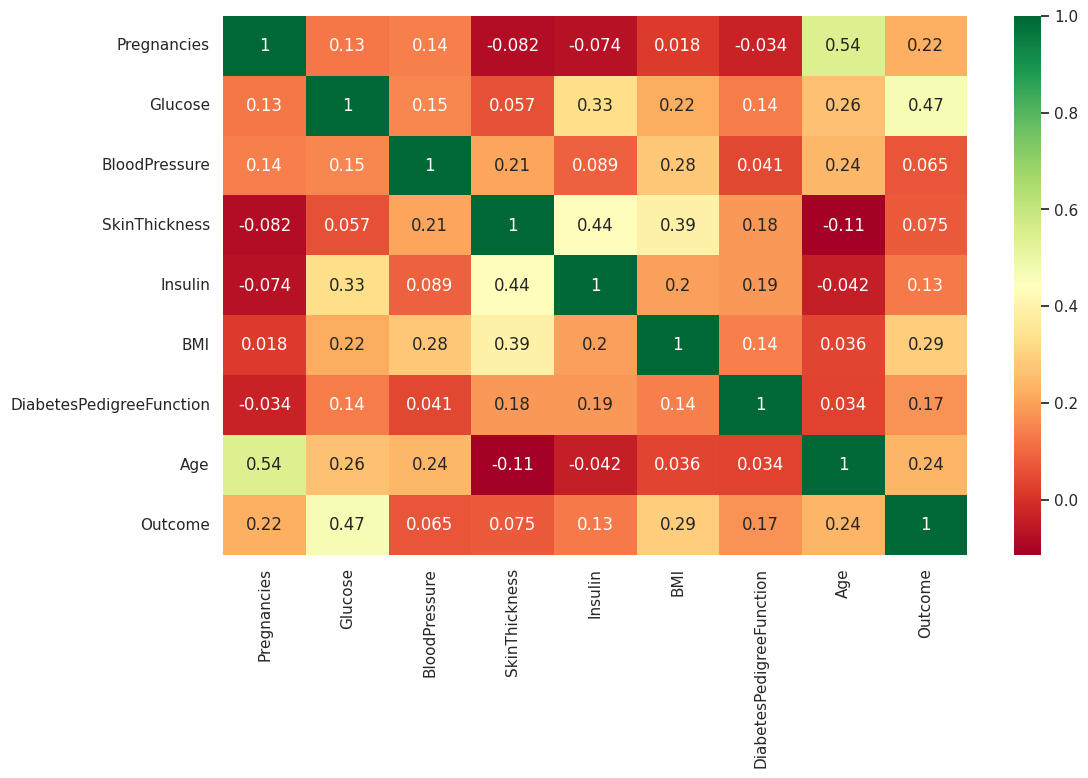

In [34]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,7))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap ='RdYlGn') #sns.heatmap a function from Seaborn used to draw a heatmap
#annot->is used to display the actual data values inside each cell of the heatmap.

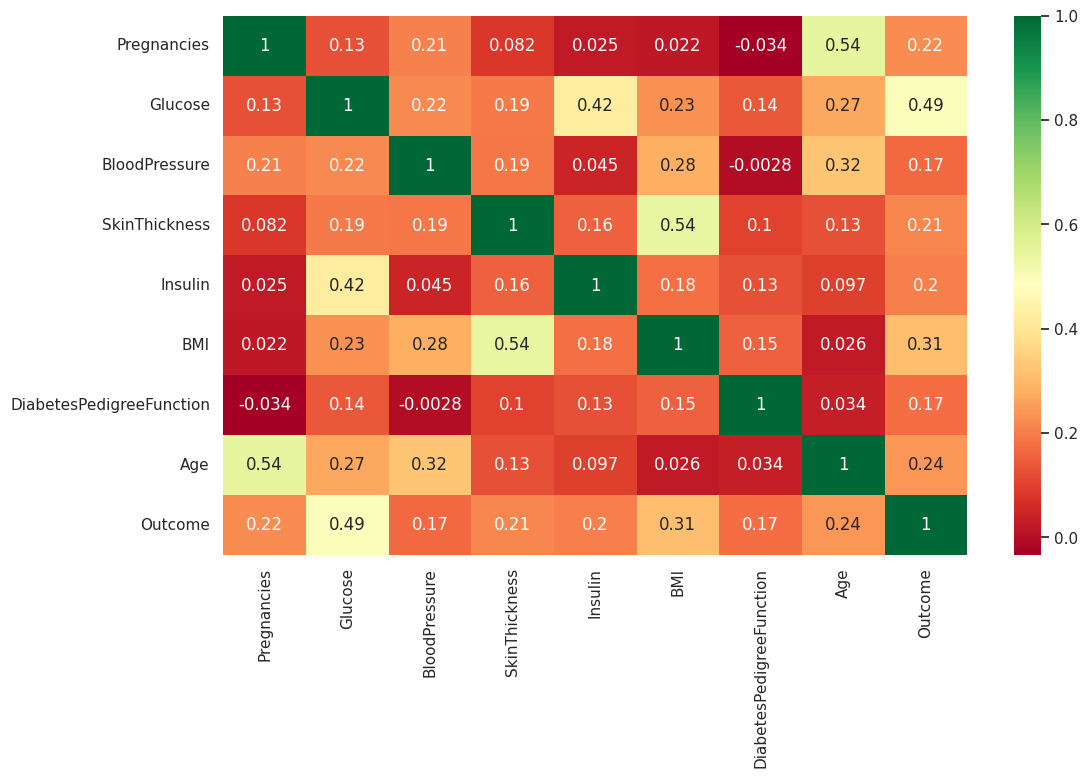

In [37]:
# Correlation between all the features after cleaning
plt.figure(figsize=(12,7))
p=sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap ='RdYlGn') #cmap-> colormap

**Scaling the Data**

In [38]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [39]:
sc_X = StandardScaler ()  #used for standardization which helps ML model for better prediction
X = pd. DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"], axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])  #dropping the outcome as it is the target column , we are doing input feature which is a measurable property or characteristic of the data that is used to make predictions.
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

StandardScaler does:
It transforms the data using the formula:
(x-mean)/sd

Where:


x = original value


μ = mean of the feature


σ = standard deviation of the feature

axis=0 rows, axis =1 column

In [40]:
y=diabetes_df_copy.Outcome

In [41]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Splitting the data into Train and Test**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=42,stratify=y)

**Model Building**

**K-Nearest Neighbor(KNN)**

In [44]:
test_scores = []
train_scores = []  #These are empty lists where you'll store accuracy scores for each k value which is Testing different values of k (number of neighbors) in KNN from 1 to 14

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train) #Fits (trains) the KNN model using the training features and labels.

  train_scores.append(knn.score(X_train,y_train)) # .score() gives the accuracy on the training set then append that accuracy to train_scores list to know how well the model fits the training data.
  test_scores.append(knn.score(X_test,y_test)) # ..... how well the model generalizes to unseen data.

Example (Classification):
Let's say k = 3, and you want to classify a new point.

The algorithm:

Finds the 3 nearest points from training data.

Checks their labels (e.g., [1, 0, 1]).

Predicts the majority class → result is 1.

In [45]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [46]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [56]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]  #enumerate(train_scores) gives both index (i) and value (v) while looping.It collects all indices i where the accuracy value v equals the max.
print('Max train score {} % and k ={}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))  # k values start from 1 (not 0), but Python list indexes start from 0. So this line adds +1 to each index to get the actual k values used in the loop.

Max train score 100.0 % and k =[1]


In [57]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k ={}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k =[11]


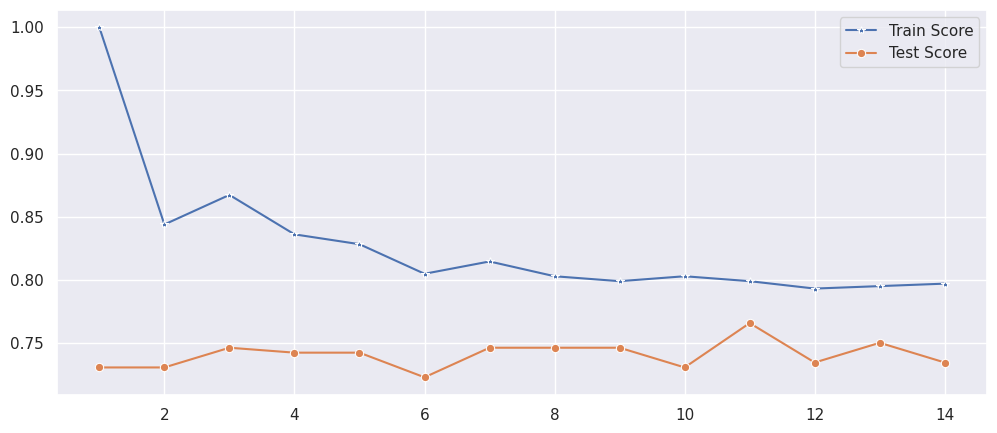

In [61]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')


The best result is captured at k=11 hence 11 is used for the final model but k=1 is showing 100% accuarte just for overfitting

In [62]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn. score(X_test, y_test)

0.765625

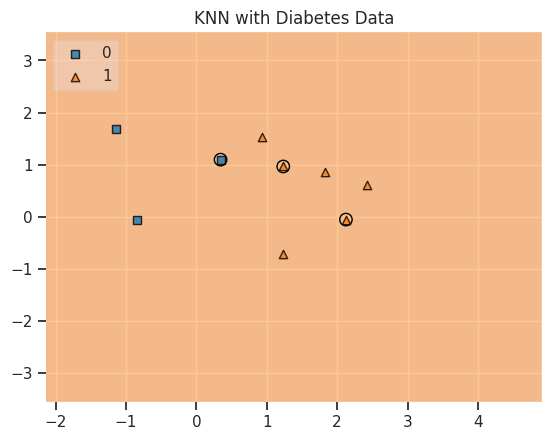

In [67]:
# Plot the Decision Boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                           filler_feature_values={2: value, 3: value, 4: value, 5: value, 6:value,7:value},
                           filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6:width, 7:width},
                           X_highlight=X_test.values)  #clf->classifier
plt.title('KNN with Diabetes Data')
plt.show()

The boundary line is not accurate and non linear

A decision boundary is a line (in 2D), curve, or surface (in higher dimensions) that a machine learning model uses to separate different classes in the feature space. eg ->Any new point above the boundary → Class 1
Any new point below the boundary → Class 0



**Confusion Matrix**

In [69]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics. confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')  #g->general format it can also be fmg='.2f'
plt. title('Confusion matrix', y=1.1)
plt. ylabel ('Actual label')
plt.xlabel ('Predicted label')

Text(0.5, 19.049999999999997, 'Predicted label')

In [70]:
# Classification Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



if 100 diabetic patient are there and model correctly predicts 60 then recall is 60%

TP0=142, TP1=54 therefore 196 then 196/256 became 77 which is the accuracy

Macro avg

Macro Precision = (0.80 + 0.68) / 2 = 0.74

Macro Recall = (0.85 + 0.61) / 2 = 0.73

Macro F1 = (0.83 + 0.64) / 2 = 0.735 → shown as 0.73

Weighted avg

weighted_precision = (0.80 × 167 + 0.68 × 89) / 256
                   ≈ (133.6 + 60.52) / 256 ≈ 0.76

weighted_recall = (0.85 × 167 + 0.61 × 89) / 256
                ≈ (141.95 + 54.29) / 256 ≈ 0.77

weighted_f1 = (0.83 × 167 + 0.64 × 89) / 256
            ≈ (138.61 + 56.96) / 256 ≈ 0.76

**ROC-AUC Curve**  Receiver Operating Characteristic – Area Under the Curve

In [71]:
y_pred_proba = knn.predict_proba(X_test) [ : , 1]  # This returns the predicted probabilities for each class ,[:, 1]->This selects only the probability of class 1 (positive class) and evaluating how confident the model is about class 1.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

fpr	False Positive Rate: FP / (FP + TN)

tpr	True Positive Rate (Recall): TP / (TP + FN)

thresholds	The probability cut-offs used to compute FPR/TPR

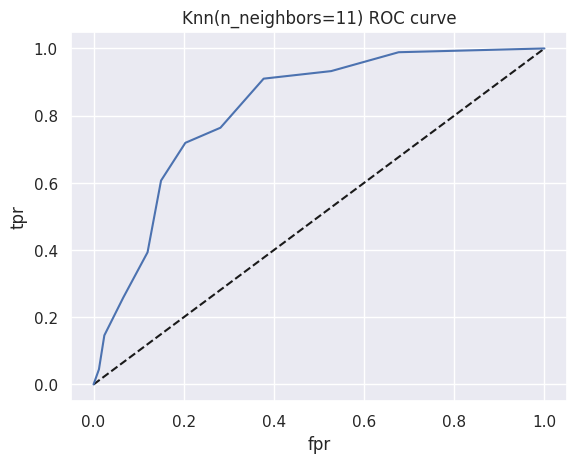

In [74]:
plt. plot([0,1], [0,1],'k--')  #k-- black color dashed line
plt. plot(fpr, tpr, label='Knn' )
plt. xlabel ('fpr')
plt. ylabel('tpr')
plt. title('Knn(n_neighbors=11) ROC curve')
plt. show()

In [75]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.8193500639171096)

Implementing GridSearchCV

In [79]:
# In case of Classifier Like KNN the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors' :np.arange(1,50)}  #This creates a dictionary to test n_neighbors values from 1 to 49
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(X,y)
best_k = int(knn_cv.best_params_['n_neighbors'])

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters, n_neighbors: " + str(best_k))

Best Score:0.7721840251252015
Best Parameters, n_neighbors: 25


n_neighbors is the key hyperparameter in KNN (controls how many neighbors are considered when predicting).



GridSearchCV = automatic model tuning tool. It:

Tests all combinations in param_grid.

Performs 5-fold cross-validation (cv=5) for each n_neighbors value. The data is split into 5 folds:Train on 4, test on 1 — repeat 5 times.

Selects the one with the best average validation score.

